<a href="https://colab.research.google.com/github/steinjm21/ColabInClass/blob/main/matplotlibProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
!git clone https://github.com/steinjm21/matplotlibProject.git

fatal: destination path 'matplotlibProject' already exists and is not an empty directory.


Defining function to be outputted to .csv

In [46]:
import numpy as np
import sys
import datetime
import math

In [47]:
def inside_circle(total_count):
    x = np.random.uniform(size=total_count)
    y = np.random.uniform(size=total_count)
    radii = np.sqrt(x*x + y*y)
    count = len(radii[np.where(radii<=1.0)])
    return count

I found using np.empty and np.vstack to be more efficient (it actually worked) with the code I had written and tried to painstakingly edit for hours.

In [53]:
if __name__ == '__main__':
    grid = np.empty((0, 4))

    # printing requested outputs
    n_samples = int(15000)
    start_time = datetime.datetime.now()
    counts = inside_circle(n_samples)
    my_pi = 4.0 * counts / n_samples
    end_time = datetime.datetime.now()
    elapsed_time = (end_time - start_time).total_seconds()
    size_of_float = np.dtype(np.float64).itemsize
    memory_required = 3 * n_samples * size_of_float / (1024**3)
    print("# of Samples: {}, Pi: {}, memory: {} GiB, time: {} s".format(
          n_samples, my_pi, memory_required, elapsed_time))

    #for loop iterating over sample sizes of 100 to 15000 (larger ranges did not run)
    for n in range(100, 15001):
      n_samples = int(n)
      start_time = datetime.datetime.now()
      counts = inside_circle(n_samples)
      my_pi = 4.0 * counts / n_samples
      end_time = datetime.datetime.now()
      elapsed_time = (end_time - start_time).total_seconds()
      size_of_float = np.dtype(np.float64).itemsize
      memory_required = 3 * n_samples * size_of_float / (1024**3)
      abs_err = abs(my_pi - math.pi)
      rel_err = abs(abs_err / math.pi) / abs(math.pi)
      grid = np.vstack([grid, [n_samples, rel_err, memory_required, elapsed_time]])
    np.savetxt('matplotlibProject.csv', grid, delimiter=',')

# of Samples: 15000, Pi: 3.1293333333333333, memory: 0.00033527612686157227 GiB, time: 0.001016 s


.csv has been saved. Now time to call it back and assign variables to each column.

In [54]:
data = np.loadtxt(fname='matplotlibProject.csv',
delimiter=',')
n_val=data[ : , 0 ]
err_val=data[ : , 1]
mem_val=data[ : , 2]
time_val=data[ : , 3]

log-log for N vs. error

-0.4960671507748718 -1.0690384050132682


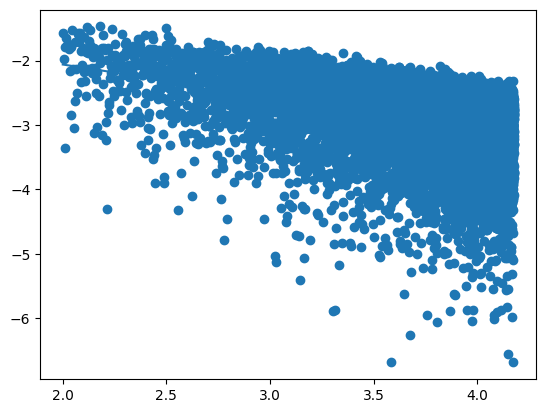

In [60]:
import matplotlib
log_n =[]
for n in range(len(n_val)):
 log_n.append(math.log(n_val[n],10))
log_err =[]
for err in err_val:
 log_err.append(math.log(err,10))
matplotlib.pyplot.scatter(log_n,log_err)

-0.4960671507748718 -1.0690384050132682


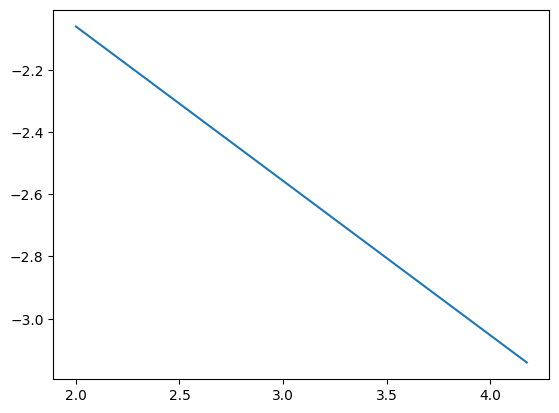

In [62]:
z = np.polyfit(log_n, log_err, 1)
p = np.poly1d(z)
matplotlib.pyplot.plot(log_n, p(log_n))
print(z[0],z[1])
# z[0] is the slope of the trendline
# z[1] is the y-intercept of the trendline

N vs. memory

ValueError: x and y must be the same size

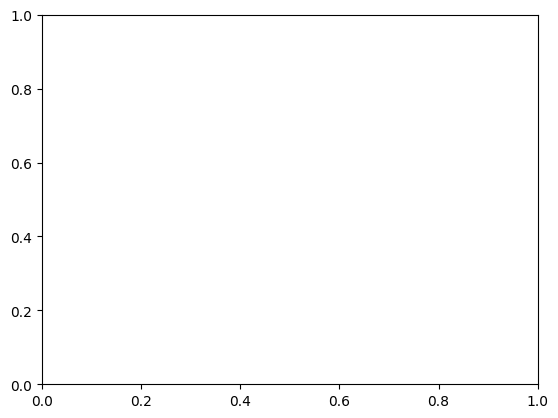

In [59]:
log_mem =[]
for mem in mem_val:
 log_err.append(math.log(mem,10))
matplotlib.pyplot.scatter(log_n,log_mem)

In [63]:
z = np.polyfit(log_n, log_mem, 1)
p = np.poly1d(z)
matplotlib.pyplot.plot(log_n, p(log_n))
print(z[0],z[1])

TypeError: expected x and y to have same length

N vs. time

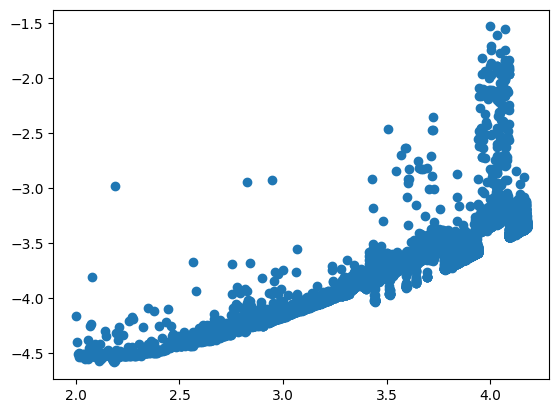

In [57]:
log_time =[]
for time in time_val:
 log_time.append(math.log(time,10))
matplotlib.pyplot.scatter(log_n,log_time)

0.7110959551111186 -6.241836391370882


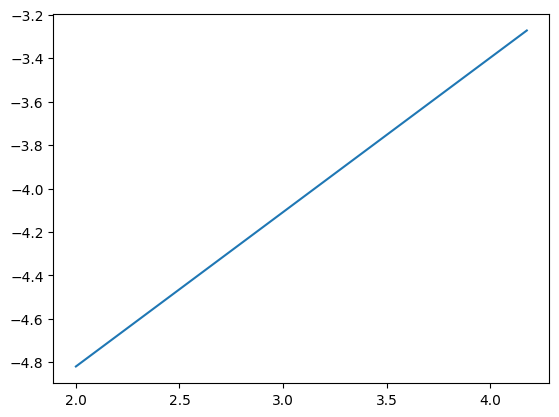

In [64]:
z = np.polyfit(log_n, log_time, 1)
p = np.poly1d(z)
matplotlib.pyplot.plot(log_n, p(log_n))
print(z[0],z[1])